# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

### *Help to International Student Selecting Neighborhood*
*By [Jesús Romero Palacio](https://www.linkedin.com/in/jesusromeropalacio/)*

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

----
## 1. Introduction: Business Problem <a name="introduction"></a>

If it does not consider the atypical pandemic year 2020, the number of international students has been growing annually in Canada; 642000 immigrants arrived in 2019, nearly 50% study in Ontario [1].

There are a thousand reasons to international students prefer Toronto, Canada, which was ranked in 2019 as 11th of 50 best cities in the world for students. The study, requiring eligible cities to have a population over 250,000, and have at least two institutions featured in the QS World University Rankings, was based on five themes including university rankings, student mix, employer activity, quality of living, and affordability [2]

Toronto offers various types of lifestyles zones according to different preferences [3]. For this capstone project, it will focus on one type of international student, based on a friend (it will call her "Linda") who wants to travel to complete her postgraduate studies. She wants to rent a one-bedroom apartment with the following neighbourhood features:

**1-	The rent price around CAD 1.700 (1 bedroom)**

**2-	Secure Levels**

**4-	Near to different public transportation options (bus, train, metro...)**

**5-	Near to food places**

**6-	Near to a park**

Although there are online home rental platforms, this information is not enough to obtain all information that she needs. For this reason, it will create a map and information chart with some neighbourhoods options that could fit to her requirements.

____
## 2. Data <a name="data"></a>

It will use the data as below:

**2.1-	The rent price around CAD 1.700 (1 bedroom):**

*From Zumper (home rental website)[4] and Canada Mortgage and Housing Corporation, the average rent.* [5]

**2.2-	Secure Levels:**

*From Toronto Police Service, the Major Crime Indicator - MCI (2014 to 2019).* [6]
    
**2.3-	Neighbourhoods fit to the desired rental value and securest:**

*From the previous data.*

**2.4-	The coordinates of neighbourhoods fit to the desired rental value and securest:**

*From Toronto Police Service, the Major Crime Indicator - MCI.* [6]

**2.5-	Venues in neighborhoods:**

*Foursquare API to get the most common venues from the Toronto selected neighbourhoods.*[7]
    
**2.6-	General information about neighbourhoods:**

*From the previous data.*

---
## 3. Methodology <a name="methodology"></a>

In this project it will work with the data before with the follow methodology:

**3.1-	The rent price around CAD 1.700 (1 bedroom):**

*- It will use a histogram to create 5 ranges and classify the average rent by neighbourhoods, with that, it can get the neighbourhoods that fit requirements.*

**3.2-	Secure Levels:**

*- It will use a histogram to create 5 ranges and classify the MCI by neighbourhoods, with that, it can get the neighbourhoods that fit requirements.*

**3.3-	Neighbourhoods fit to the desired rental value and securest:**

*- It will select the neighbourhoods that fit the desired rental value and are securest.*
    
**3.4-	The coordinates of neighbourhoods adjusted to the desired rental value and securest:**

*- It will use the neighbourhoods coordinates reported in the data from Toronto Police Service.*

**3.5-	Venues in neighbourhoods:**

*- It will...:*

*... use the selected neighbourhoods and its coordinates from before data.*
 
*... select the near venues for each neighbourhood (500 m).*

*... classify by venue category and group by neighbourhood.*
        
*... use "Elbow methodology" to select the best K to use for K-means algorithm to cluster the neighbourhoods.*
        
*... use unsupervised learning K-means algorithm to cluster the neighbourhoods.*
        
*... show the most common venues categories from neighbourhoods clusters.*
    
**3.6-	General information about neighbourhoods:**

*- It will show, in clusters, the general information about venues categories of interest (public transportation options, food places, and parks).*

*- It will show the mean of MCI and rent of one-bedroom apartments in clusters.*

----
## 4. Analysis <a name="analysis"></a>

----
**4.1-	The rent price around CAD 1.700 (1 bedroom):**

First, it will obtain the values of one bedroom apartments rent, in Toronto neighborhoods, the data is from Zumper (home rental website)[4] and Canada Mortgage and Housing Corporation.[5]

In [1]:
import pandas as pd # primary data structure library
import numpy as np # library to handle data in a vectorized manner

!wget -O average_rent.csv https://www.dropbox.com/s/sfxfal5e97awjlr/Rent_Avg_Toronto.csv?dl=0

--2021-02-07 01:25:56--  https://www.dropbox.com/s/sfxfal5e97awjlr/Rent_Avg_Toronto.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6050:18::a27d:b12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sfxfal5e97awjlr/Rent_Avg_Toronto.csv [following]
--2021-02-07 01:25:56--  https://www.dropbox.com/s/raw/sfxfal5e97awjlr/Rent_Avg_Toronto.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f749880ba8bc4f3b48d15cf53.dl.dropboxusercontent.com/cd/0/inline/BIcGTRO8DMjAJcphH2mwlm2Vzu28m59GMMBfRK0-EX2ZcruQOgD1nI79LGTYuErjB9CoJ7nO_6q9gLAUkobulzGaiFTuMWa2ncmj9nPOM1URIeU0bzgFpL8M0XlhNJxjV2U/file# [following]
--2021-02-07 01:25:57--  https://uc9f749880ba8bc4f3b48d15cf53.dl.dropboxusercontent.com/cd/0/inline/BIcGTRO8DMjAJcphH2mwlm2Vzu28m59GMMBfRK0-EX2ZcruQOgD1nI79LGTYuErjB9CoJ7nO_6q9gLAUko

In [2]:
#read the csv
rent_df_1Bed = pd.read_csv('average_rent.csv', header=None, names=['Neighbourhood', 'Hood_ID', 'Avg_Rent_1Bed'] , sep=';')
rent_df_1Bed.head()

,Neighbourhood,Hood_ID,Avg_Rent_1Bed
0,Agincourt North,129,1695.0
1,Agincourt South-Malvern West,128,1627.0
2,Alderwood,20,1650.0
3,Annex,95,1680.0
4,Banbury-Don Mills,42,1800.0


In [3]:
rent_df_1Bed.dtypes #Exploring and understanding the data

Neighbourhood     object
Hood_ID           object
Avg_Rent_1Bed    float64
dtype: object

In [4]:
rent_df_1Bed.describe #Exploring and understanding the data

<bound method NDFrame.describe of                     Neighbourhood Hood_ID  Avg_Rent_1Bed
0                 Agincourt North     129         1695.0
1    Agincourt South-Malvern West     128         1627.0
2                       Alderwood      20         1650.0
3                           Annex      95         1680.0
4               Banbury-Don Mills      42         1800.0
..                            ...     ...            ...
147                           NaN     NaN            NaN
148                           NaN     NaN            NaN
149                           NaN     NaN            NaN
150                           NaN     NaN            NaN
151                           NaN     NaN            NaN

[152 rows x 3 columns]>

In [5]:
rent_df = rent_df_1Bed.dropna().copy() #Data preparation

In [6]:
rent_df['Avg_Rent_1Bed'] = rent_df['Avg_Rent_1Bed'].astype(np.int64) #Data preparation

In [7]:
rent_df #Exploring and understanding the data

,Neighbourhood,Hood_ID,Avg_Rent_1Bed
0,Agincourt North,129,1695
1,Agincourt South-Malvern West,128,1627
2,Alderwood,20,1650
3,Annex,95,1680
4,Banbury-Don Mills,42,1800
...,...,...,...
130,Wychwood,94,1750
131,Yonge-Eglinton,100,2100
132,Yonge-St.Clair,97,1793
133,York University Heights,27,1509


----

*Now, it is going to create a histogram with 5 bins, to know the behavior of average values of one bedroom apartments in all neighbourhoods of Toronto, and classify according to the rent values.*

In [8]:
# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

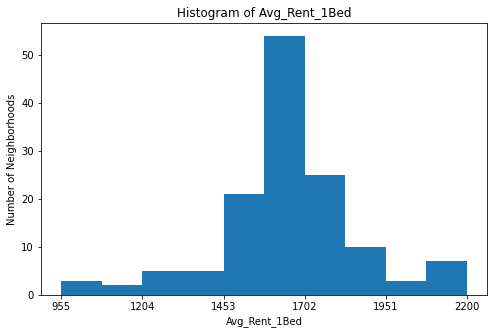

In [9]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(rent_df['Avg_Rent_1Bed'], 5)

rent_df['Avg_Rent_1Bed'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Avg_Rent_1Bed') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Avg_Rent_1Bed') # add x-label

plt.show()

In [10]:
print(bin_edges) #bins of rent averages

[ 955. 1204. 1453. 1702. 1951. 2200.]


It can define the next ranges of rent for one bedroom apartments:

- **Low:**        955 - 1204
- **Mid Low:**    1204 - 1453
- **Mid High:**   1453 - 1702
- **High:**       1702 - 1951
- **Upper High:** 1951 - 2200

According to the desire rent for one bedroom apartment (around CAD 1.700), it is going to select the "Low", "Mid Low" and "Mid High" ranges, and it will create a dataframe (desire_rent) with the neigbourhoods and its average rent.

In [11]:
desire_rent = rent_df[rent_df['Avg_Rent_1Bed'].between(949 , 1702)].copy() #creating dataframe
desire_rent.head()

,Neighbourhood,Hood_ID,Avg_Rent_1Bed
0,Agincourt North,129,1695
1,Agincourt South-Malvern West,128,1627
2,Alderwood,20,1650
3,Annex,95,1680
5,Bathurst Manor,34,1638


In [12]:
desire_rent["Hood_ID"] = pd.to_numeric(desire_rent["Hood_ID"]) #preparing dataframe

In [13]:
print(desire_rent.shape) #exploring dataframe
print(desire_rent.dtypes)

(90, 3)
Neighbourhood    object
Hood_ID           int64
Avg_Rent_1Bed     int64
dtype: object


---
**4.2-	Secure Levels:**

First, it will obtain the values of the Major Crime Indicator - MCI, from Toronto Police Service (2014 to 2019). [6]

In [14]:
df=pd.read_csv("https://prod-hub-indexer.s3.amazonaws.com/files/56a0d46ae5f141269f2598a8c07e25c1/0/full/3857/56a0d46ae5f141269f2598a8c07e25c1_0_full_3857.csv",index_col=0)

In [15]:
df.head() #exploring data

,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
X,,,,,,,,,,,,,,,,,,,,,
-8.840549e+06,5.431712e+06,201,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,2014,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,1
-8.840549e+06,5.431712e+06,202,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,2014,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2
-8.840549e+06,5.431712e+06,203,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,2014,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,3
-8.840549e+06,5.431712e+06,204,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,2014,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,4
-8.839881e+06,5.413806e+06,205,GO-20141300854,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Commercial,2120,200,B&E,2014,...,7.0,Tuesday,21,Break and Enter,D14,79,University (79),43.665390,-79.410,5


In [16]:
df.drop(df.columns.difference(['reportedyear','MCI','Division','Neighbourhood','Hood_ID','Lat','Long']),1,inplace=True) #data preparation
df.head()

,reportedyear,MCI,Division,Hood_ID,Neighbourhood,Lat,Long
X,,,,,,,
-8.840549e+06,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
-8.840549e+06,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
-8.840549e+06,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
-8.840549e+06,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
-8.839881e+06,2014,Break and Enter,D14,79,University (79),43.665390,-79.410


In [17]:
df.reset_index(drop=True, inplace = True) #data preparation
df.head()

,reportedyear,MCI,Division,Hood_ID,Neighbourhood,Lat,Long
0,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
1,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
2,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
3,2014,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416
4,2014,Break and Enter,D14,79,University (79),43.665390,-79.410


In [18]:
crimes_df_data = df.copy() #data preparation

In [19]:
len(crimes_df_data['Neighbourhood'].unique()) #data preparation

140

In [20]:
crimes_df_data['Neighbourhood'] = crimes_df_data['Neighbourhood'].str.replace('\\(.*\)', '') #data preparation
crimes_df_data.head()

,reportedyear,MCI,Division,Hood_ID,Neighbourhood,Lat,Long
0,2014,Assault,D32,36,Newtonbrook West,43.781639,-79.416
1,2014,Assault,D32,36,Newtonbrook West,43.781639,-79.416
2,2014,Assault,D32,36,Newtonbrook West,43.781639,-79.416
3,2014,Assault,D32,36,Newtonbrook West,43.781639,-79.416
4,2014,Break and Enter,D14,79,University,43.665390,-79.410


In [21]:
LatLong = crimes_df_data.drop_duplicates(subset = ["Neighbourhood"]).copy() #data preparation

In [22]:
LatLong.drop(columns=['reportedyear', 'MCI','Division'], inplace=True) #obtaining the coordinates from dataframe
LatLong.sort_values(by='Neighbourhood', inplace=True)

In [23]:
LatLong.head()

,Hood_ID,Neighbourhood,Lat,Long
15,129,Agincourt North,43.814259,-79.268
103,128,Agincourt South-Malvern West,43.788063,-79.284
461,20,Alderwood,43.600014,-79.544
72,95,Annex,43.671135,-79.391
87,42,Banbury-Don Mills,43.734287,-79.344


In [24]:
crimes_neighbourhood = crimes_df_data.groupby(['Neighbourhood']).count().sort_values(by='MCI', ascending=False).reset_index().copy() #Get the MCI total
crimes_neighbourhood.sort_values(by='Neighbourhood', inplace=True)
crimes_neighbourhood.head()

,Neighbourhood,reportedyear,MCI,Division,Hood_ID,Lat,Long
65,Agincourt North,1157,1157,1157,1157,1157,1157
40,Agincourt South-Malvern West,1650,1650,1650,1650,1650,1650
123,Alderwood,545,545,545,545,545,545
11,Annex,2917,2917,2917,2917,2917,2917
61,Banbury-Don Mills,1205,1205,1205,1205,1205,1205


In [25]:
crimes_neighbourhood.drop(columns=['reportedyear','Division', 'Hood_ID', 'Lat','Long'], inplace = True) #Preparing MCI Total Dataframe
crimes_neighbourhood.sort_values(by='Neighbourhood', inplace=True)
crimes_neighbourhood.head()

,Neighbourhood,MCI
65,Agincourt North,1157
40,Agincourt South-Malvern West,1650
123,Alderwood,545
11,Annex,2917
61,Banbury-Don Mills,1205


In [26]:
crimes_neighbourhood = pd.merge(crimes_neighbourhood, LatLong, on=['Neighbourhood'], left_index=False) #insert coordinates to MCI Total by neigbourhoods
crimes_neighbourhood.head()

,Neighbourhood,MCI,Hood_ID,Lat,Long
0,Agincourt North,1157,129,43.814259,-79.268
1,Agincourt South-Malvern West,1650,128,43.788063,-79.284
2,Alderwood,545,20,43.600014,-79.544
3,Annex,2917,95,43.671135,-79.391
4,Banbury-Don Mills,1205,42,43.734287,-79.344


In [27]:
crimes_neighbourhood.shape

(140, 5)

In [28]:
min_Value_Total = crimes_neighbourhood['MCI'].min() #exploring data
print("minimum value in column 'MCI': " , min_Value_Total)

max_Value_Total = crimes_neighbourhood['MCI'].max()
print("maximun value in column 'MCI': " , max_Value_Total)

minimum value in column 'MCI':  353
maximun value in column 'MCI':  7747


-------
*- It will use a histogram to create 5 ranges and classify the MCI by neighbourhoods, with that I can get the neighbourhoods that fit to requirements.*

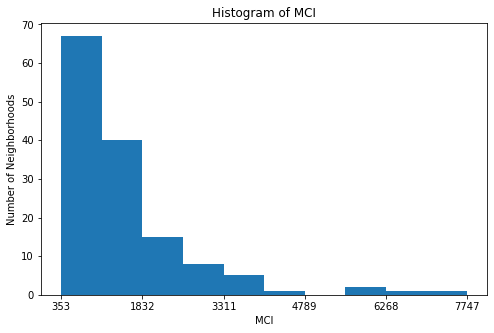

In [29]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(crimes_neighbourhood['MCI'], 5)

crimes_neighbourhood['MCI'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of MCI') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('MCI') # add x-label

plt.show()

In [30]:
print(bin_edges)

[ 353.  1831.8 3310.6 4789.4 6268.2 7747. ]


It can define ranges of the crimes in the Neighbohood:

- **Low:**        353 - 1832
- **Mid Low:**    1832 - 3311
- **Mid High:**   3311 - 4790
- **High:**       4790 - 6269
- **Upper High:** 6269 - 7747


"Linda" wants the secure neighbourhood, because of that it will select the "Low" range, and it will create a dataframe (desire_secure) with the neigbourhoods and their coordinates.

In [31]:
desire_secure = crimes_neighbourhood[crimes_neighbourhood['MCI'].between(353 , 1832)].copy()
desire_secure.head()

,Neighbourhood,MCI,Hood_ID,Lat,Long
0,Agincourt North,1157,129,43.814259,-79.268
1,Agincourt South-Malvern West,1650,128,43.788063,-79.284
2,Alderwood,545,20,43.600014,-79.544
4,Banbury-Don Mills,1205,42,43.734287,-79.344
5,Bathurst Manor,727,34,43.763763,-79.457


-----
**4.3-	Neighbourhoods fit to the desired rental value and securest:**

*- It will select the neighbourhoods that fit the desired rental value and are securest.*

In [32]:
desire_secure['Hood_ID'].isin(desire_rent['Hood_ID']).value_counts() #explore the join

True     66
False    41
Name: Hood_ID, dtype: int64

In [33]:
drop_rent =  desire_rent.drop(columns=['Neighbourhood']).copy() #creating the dataframe with desired leves of rent and safety 
drop_rent.head()

,Hood_ID,Avg_Rent_1Bed
0,129,1695
1,128,1627
2,20,1650
3,95,1680
5,34,1638


In [34]:
desire_secure_rent = pd.merge(desire_secure, drop_rent, on= 'Hood_ID') #creating the dataframe with desired leves of rent and safety 

In [35]:
desire_secure_rent.head() #creating the dataframe with desired leves of rent and safety 

,Neighbourhood,MCI,Hood_ID,Lat,Long,Avg_Rent_1Bed
0,Agincourt North,1157,129,43.814259,-79.268,1695
1,Agincourt South-Malvern West,1650,128,43.788063,-79.284,1627
2,Alderwood,545,20,43.600014,-79.544,1650
3,Bathurst Manor,727,34,43.763763,-79.457,1638
4,Bayview Village,927,52,43.767078,-79.380,1700


In [36]:
desire_secure_rent.shape

(66, 6)

-----
Now, that it want to know more about the "desire_secure_rent" neighbourhoods and it will create a map with its geolocations:

In [37]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium
print('Folium installed and imported!')

     |████████████████████████████████| 112kB 5.5MB/s eta 0:00:01
Folium installed and imported!


In [38]:
# @hidden_cell
geolocator = Nominatim(user_agent='jsromerop@hotmail.com')

In [39]:
address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [40]:
# create map
Toronto_map_Sec = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, neighborhood, MCI, AvgRent in zip(desire_secure_rent['Lat'], desire_secure_rent['Long'], desire_secure_rent['Neighbourhood'],desire_secure_rent['MCI'], desire_secure_rent['Avg_Rent_1Bed']):
    label = '{},{}'.format(neighborhood, MCI)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_map_Sec)  
    
Toronto_map_Sec

--------
**4.4-	Venues in neighbourhoods:**

*- It will...:*

*... use the selected neighbourhoods and their coordinates from before data.*
 
*... use Foursquare API and select the near venues for each neighbourhood (500 m).*

*... classify by venue category and group by neighbourhood.*

*... Select the 10th most common venues for each neighbourhood.*
        
*... use "Elbow methodology" to select the best K to use for K-means algorithm to cluster the neighbourhoods.*
        
*... use unsupervised learning K-means algorithm to cluster the neighbourhoods.*
        
*... show the most common venues categories from neighbourhoods clusters.*

In [41]:
import requests # library to handle requests
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


----
*It will use the selected neighbourhoods and their coordinates from before data.*
 
*It use Foursquare API and select the near venues for each neighbourhood (500 m).*

In [42]:
# @hidden_cell
CLIENT_ID = 'V4ZEN1QNOD1IS5L5DNKK0KHYJ3XVNPZHXKWBGSQ0APXZEI2B' # your Foursquare ID
CLIENT_SECRET = '5Y4YQIMIWDA5PTY2NPIKZ3CBOVETIYVIBJCJAYFXCDT2HRL1' # your Foursquare Secret
ACCESS_TOKEN = 'WDE1UPPXESZUKVTGLA4LNNZLV10WJY3T31P1KIMW1K0IRF5U#_=_' # your FourSquare Access Token
VERSION = '20210204'
LIMIT = 100

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
sec_rent_toronto_venues = getNearbyVenues(names=desire_secure_rent['Neighbourhood'],
                                   latitudes=desire_secure_rent['Lat'],
                                   longitudes=desire_secure_rent['Long']
                                  )

Agincourt North 
Agincourt South-Malvern West 
Alderwood 
Bathurst Manor 
Bayview Village 
Bedford Park-Nortown 
Beechborough-Greenbrook 
Birchcliffe-Cliffside 
Briar Hill-Belgravia 
Bridle Path-Sunnybrook-York Mills 
Broadview North 
Brookhaven-Amesbury 
Caledonia-Fairbank 
Centennial Scarborough 
Clanton Park 
Cliffcrest 
Danforth East York 
Don Valley Village 
Edenbridge-Humber Valley 
Elms-Old Rexdale 
Englemount-Lawrence 
Flemingdon Park 
Forest Hill North 
Forest Hill South 
Guildwood 
Henry Farm 
High Park North 
High Park-Swansea 
Highland Creek 
Humber Heights-Westmount 
Humber Summit 
Humbermede 
Humewood-Cedarvale 
Junction Area 
Keelesdale-Eglinton West 
Kingsview Village-The Westway 
Lansing-Westgate 
Leaside-Bennington 
Long Branch 
Maple Leaf 
Milliken 
Mount Dennis 
New Toronto 
North St.James Town 
O'Connor-Parkview 
Oakridge 
Oakwood Village 
Old East York 
Parkwoods-Donalda 
Playter Estates-Danforth 
Pleasant View 
Rexdale-Kipling 
Rockcliffe-Smythe 
Runnymede-Bloor 

In [45]:
print(sec_rent_toronto_venues.shape) #Exploring data on safe and rent desirable neighborhoods
sec_rent_toronto_venues.head()

(768, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.814259,-79.268,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
1,Agincourt North,43.814259,-79.268,Booster Juice,43.809915,-79.269382,Juice Bar
2,Agincourt North,43.814259,-79.268,Tim Hortons,43.809993,-79.269032,Coffee Shop
3,Agincourt North,43.814259,-79.268,TD Canada Trust,43.809828,-79.268764,Bank
4,Agincourt North,43.814259,-79.268,Woodside Cinemas,43.809900,-79.269521,Movie Theater


In [46]:
print('There are {} uniques categories.'.format(len(sec_rent_toronto_venues['Venue Category'].unique()))) #Exploring data on safe and rent desirable neighborhoods

There are 173 uniques categories.


---
*It will classify by venue category and group by neighbourhood.*

In [47]:
# one hot encoding
toronto_onehot = pd.get_dummies(sec_rent_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = sec_rent_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(10)

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint,Yoga Studio
0,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Agincourt North,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Agincourt South-Malvern West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Agincourt South-Malvern West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Alderwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
toronto_onehot.shape

(768, 174)

In [49]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint,Yoga Studio
0,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Agincourt South-Malvern West,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Bathurst Manor,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Victoria Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0
62,Westminster-Branson,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0
63,Willowridge-Martingrove-Richview,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.142857,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
64,Woodbine Corridor,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.043478,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


----
*It will Select the 10th most common venues for each neighbourhood.*

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Restaurant,Coffee Shop,Juice Bar,Trail,Indian Restaurant,Bank,Movie Theater,Dog Run,Filipino Restaurant,Fast Food Restaurant
1,Agincourt South-Malvern West,Coffee Shop,Food Court,Yoga Studio,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
2,Alderwood,Pizza Place,Skating Rink,Gas Station,Coffee Shop,Pub,Gym,Art Gallery,Flea Market,Fish & Chips Shop,Filipino Restaurant
3,Bathurst Manor,Convenience Store,Playground,Park,Baseball Field,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
4,Bayview Village,Clothing Store,Pizza Place,Liquor Store,Spa,Sporting Goods Shop,Café,Bank,Shopping Mall,Gas Station,Gourmet Shop


In [52]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
toronto_grouped_clustering.head()

,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
toronto_grouped_clustering.shape

(66, 173)

In [54]:
!pip install "scikit_learn==0.22.2.post1"

!pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans # import k-means from clustering stage


# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

print('Libraries imported.')

     |████████████████████████████████| 7.1MB 6.1MB/s eta 0:00:01     |█▎                              | 286kB 3.0MB/s eta 0:00:03��██▎  | 6.5MB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 18.8MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
     |████████████████████████████████| 276kB 6.5MB/s eta 0:00:01
Libraries imported.


---
*It will use "Elbow methodology" to select the best K to use for K-means algorithm to cluster the neighbourhoods.*

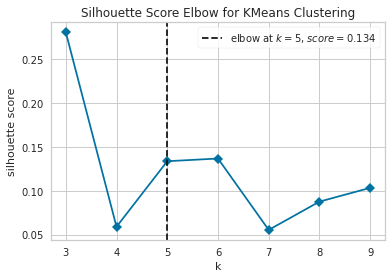

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [94]:
kclusters = (3,10)
# run k-means clustering
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(toronto_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()      

---    
*It will use unsupervised learning K-means algorithm to cluster the neighbourhoods.*

In [56]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 3, 1, 1, 1, 1, 1, 3], dtype=int32)

In [57]:
desire_secure_rent.dtypes

Neighbourhood     object
MCI                int64
Hood_ID            int64
Lat              float64
Long             float64
Avg_Rent_1Bed      int64
dtype: object

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = desire_secure_rent

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged ["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(np.uint8)
toronto_merged.head() # check the last columns!

,Neighbourhood,MCI,Hood_ID,Lat,Long,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,1157,129,43.814259,-79.268,1695,1,Restaurant,Coffee Shop,Juice Bar,Trail,Indian Restaurant,Bank,Movie Theater,Dog Run,Filipino Restaurant,Fast Food Restaurant
1,Agincourt South-Malvern West,1650,128,43.788063,-79.284,1627,0,Coffee Shop,Food Court,Yoga Studio,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
2,Alderwood,545,20,43.600014,-79.544,1650,1,Pizza Place,Skating Rink,Gas Station,Coffee Shop,Pub,Gym,Art Gallery,Flea Market,Fish & Chips Shop,Filipino Restaurant
3,Bathurst Manor,727,34,43.763763,-79.457,1638,3,Convenience Store,Playground,Park,Baseball Field,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
4,Bayview Village,927,52,43.767078,-79.380,1700,1,Clothing Store,Pizza Place,Liquor Store,Spa,Sporting Goods Shop,Café,Bank,Shopping Mall,Gas Station,Gourmet Shop


In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Lat'], toronto_merged['Long'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

------     
*It will show the most common venues categories from neighbourhoods clusters.*

In [60]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0,1] + list(range(5, toronto_merged.shape[1]))]]
print(cluster1.shape)
cluster1.head()

(1, 14)


,Neighbourhood,MCI,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Agincourt South-Malvern West,1650,1627,0,Coffee Shop,Food Court,Yoga Studio,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store


In [61]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0,1] + list(range(5, toronto_merged.shape[1]))]]
print(cluster2.shape)
cluster2.head()

(52, 14)


,Neighbourhood,MCI,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,1157,1695,1,Restaurant,Coffee Shop,Juice Bar,Trail,Indian Restaurant,Bank,Movie Theater,Dog Run,Filipino Restaurant,Fast Food Restaurant
2,Alderwood,545,1650,1,Pizza Place,Skating Rink,Gas Station,Coffee Shop,Pub,Gym,Art Gallery,Flea Market,Fish & Chips Shop,Filipino Restaurant
4,Bayview Village,927,1700,1,Clothing Store,Pizza Place,Liquor Store,Spa,Sporting Goods Shop,Café,Bank,Shopping Mall,Gas Station,Gourmet Shop
5,Bedford Park-Nortown,1240,1650,1,Greek Restaurant,Thai Restaurant,Café,Butcher,Pet Store,Sports Club,Intersection,Indian Restaurant,Pharmacy,Fruit & Vegetable Store
6,Beechborough-Greenbrook,605,1072,1,Furniture / Home Store,Fast Food Restaurant,Pet Service,Italian Restaurant,Yoga Studio,Doctor's Office,Filipino Restaurant,Falafel Restaurant,Event Service,Electronics Store


In [62]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0,1] + list(range(5, toronto_merged.shape[1]))]]
print(cluster3.shape)
cluster3.head()

(1, 14)


,Neighbourhood,MCI,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Elms-Old Rexdale,593,1600,2,Golf Course,African Restaurant,Bar,Yoga Studio,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service


In [63]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0,1] + list(range(5, toronto_merged.shape[1]))]]
print(cluster4.shape)
cluster4.head()

(10, 14)


,Neighbourhood,MCI,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bathurst Manor,727,1638,3,Convenience Store,Playground,Park,Baseball Field,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
9,Bridle Path-Sunnybrook-York Mills,560,1599,3,Dog Run,Park,Deli / Bodega,Yoga Studio,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store
13,Centennial Scarborough,508,1226,3,Pharmacy,Park,Food & Drink Shop,Supermarket,Bank,Dog Run,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service
16,Danforth East York,666,1588,3,Coffee Shop,Park,Video Store,Sandwich Place,Café,Yoga Studio,Doctor's Office,Fast Food Restaurant,Falafel Restaurant,Event Service
27,High Park-Swansea,1233,1690,3,Gym / Fitness Center,Park,Gas Station,Light Rail Station,Building,Deli / Bodega,Trail,Wine Shop,American Restaurant,Bus Stop


In [64]:
cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0,1] + list(range(5, toronto_merged.shape[1]))]]
print(cluster5.shape)
cluster5.head()

(2, 14)


,Neighbourhood,MCI,Avg_Rent_1Bed,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Henry Farm,787,1698,4,Lawyer,Middle Eastern Restaurant,Intersection,Yoga Studio,Doner Restaurant,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service
28,Highland Creek,716,1226,4,Gym / Fitness Center,Middle Eastern Restaurant,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Service,Electronics Store,Doner Restaurant


---    
**4.5-	General information about neighbourhoods:**

*- It will show, in clusters, general information about venues categories of interest (public transportation options, food places and parks).*

*- It will show the mean of MCI and rent of one bedroom apartments in clusters.*

---    
**4.5.1-	Exploring venues categories of interest:**

*- It will show, in clusters, general information about venues categories of interest (public transportation options, food places and parks).*

---    
**CLUSTER 1**

Exploring venues categories:

In [65]:
values1 = pd.value_counts(cluster1[["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue","7th Most Common Venue","8th Most Common Venue","9th Most Common Venue","10th Most Common Venue"]].values.ravel())
values1

Food Court              1
Event Service           1
Electronics Store       1
Fish & Chips Shop       1
Falafel Restaurant      1
Yoga Studio             1
Coffee Shop             1
Fast Food Restaurant    1
Dog Run                 1
Filipino Restaurant     1
dtype: int64

In [66]:
values1_df = pd.DataFrame(values1).reset_index()
values1_df.columns = ['values', 'freq']
values1_df.head()

,values,freq
0,Food Court,1
1,Event Service,1
2,Electronics Store,1
3,Fish & Chips Shop,1
4,Falafel Restaurant,1


In [67]:
from matplotlib.ticker import StrMethodFormatter

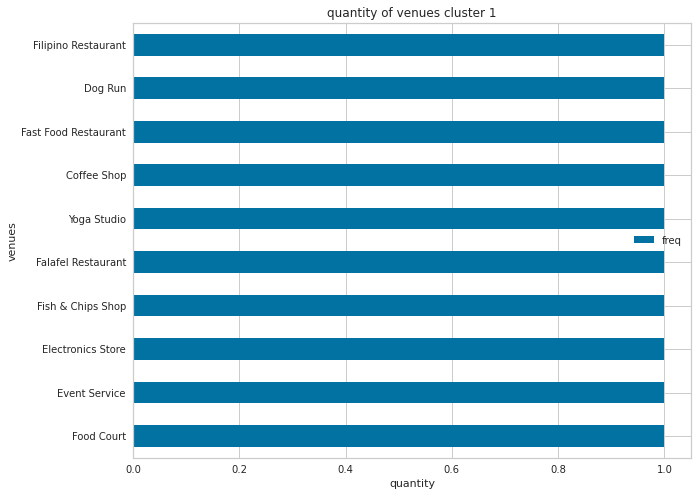

In [68]:
values1_df.plot.barh(figsize=(10, 8), x='values', y='freq')

plt.xlabel('quantity') # add to x-label to the plot
plt.ylabel('venues') # add y-label to the plot
plt.title('quantity of venues cluster 1') # add title to the plot

plt.show()

---    
**CLUSTER 2**

Exploring venues categories:

In [69]:
values2 = pd.value_counts(cluster2[["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue","7th Most Common Venue","8th Most Common Venue","9th Most Common Venue","10th Most Common Venue"]].values.ravel())
values2

Coffee Shop             25
Fast Food Restaurant    22
Pizza Place             21
Filipino Restaurant     19
Falafel Restaurant      17
                        ..
Nightclub                1
Gourmet Shop             1
Turkish Restaurant       1
Bubble Tea Shop          1
Platform                 1
Length: 133, dtype: int64

In [70]:
values2_df = pd.DataFrame(values2).reset_index()
values2_df.columns = ['values', 'freq']
values2_df.head()

,values,freq
0,Coffee Shop,25
1,Fast Food Restaurant,22
2,Pizza Place,21
3,Filipino Restaurant,19
4,Falafel Restaurant,17


In [71]:
values2_df.mean()

freq    3.909774
dtype: float64

In [72]:
values2_h = values2_df.loc[values2_df['freq'] > 4]
print(values2_h.shape)

(38, 2)


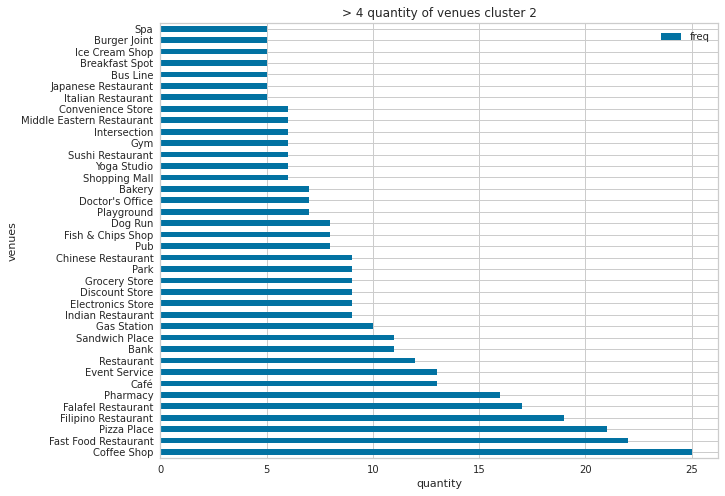

In [73]:
values2_h.plot.barh(figsize=(10, 8), x='values', y='freq')

plt.xlabel('quantity') # add to x-label to the plot
plt.ylabel('venues') # add y-label to the plot
plt.title('> 4 quantity of venues cluster 2') # add title to the plot

plt.show()

---    
**CLUSTER 3**

Exploring venues categories:

In [74]:
values3 = pd.value_counts(cluster3[["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue","7th Most Common Venue","8th Most Common Venue","9th Most Common Venue","10th Most Common Venue"]].values.ravel()) 
values3

Dog Run                 1
Golf Course             1
African Restaurant      1
Falafel Restaurant      1
Event Service           1
Yoga Studio             1
Fast Food Restaurant    1
Fish & Chips Shop       1
Bar                     1
Filipino Restaurant     1
dtype: int64

In [75]:
values3_df = pd.DataFrame(values3).reset_index()
values3_df.columns = ['values', 'freq']
values3_df.head()

,values,freq
0,Dog Run,1
1,Golf Course,1
2,African Restaurant,1
3,Falafel Restaurant,1
4,Event Service,1


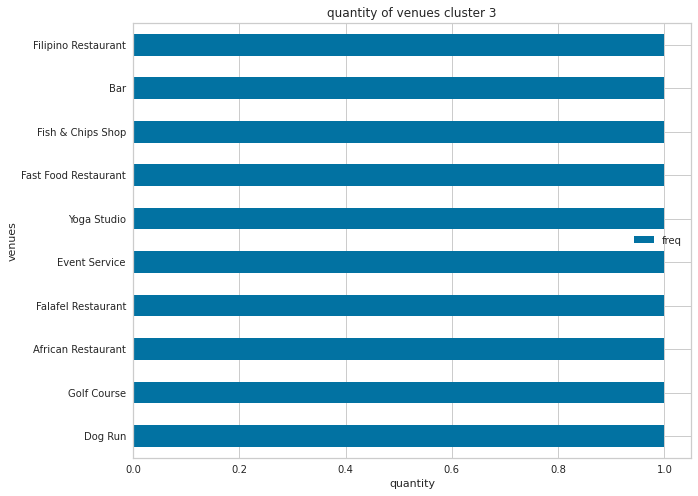

In [76]:
values3_df.plot.barh(figsize=(10, 8), x='values', y='freq')

plt.xlabel('quantity') # add to x-label to the plot
plt.ylabel('venues') # add y-label to the plot
plt.title('quantity of venues cluster 3') # add title to the plot

plt.show()

---    
**CLUSTER 4**

Exploring venues categories:

In [77]:
values4 = pd.value_counts(cluster4[["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue","7th Most Common Venue","8th Most Common Venue","9th Most Common Venue","10th Most Common Venue"]].values.ravel()) 
values4

Park                    10
Fast Food Restaurant     9
Falafel Restaurant       9
Event Service            8
Filipino Restaurant      7
Yoga Studio              5
Dog Run                  5
Electronics Store        5
Doctor's Office          4
Pharmacy                 2
Café                     2
Playground               2
Bank                     2
Coffee Shop              2
Deli / Bodega            2
Convenience Store        2
Food & Drink Shop        2
Bus Stop                 2
Trail                    2
Gym / Fitness Center     1
Metro Station            1
Doner Restaurant         1
American Restaurant      1
Wine Shop                1
Fish & Chips Shop        1
Italian Restaurant       1
Supermarket              1
Train Station            1
Video Store              1
Shopping Mall            1
Sandwich Place           1
Golf Course              1
Baseball Field           1
Intersection             1
Gas Station              1
Building                 1
Light Rail Station       1
d

In [78]:
values4_df = pd.DataFrame(values4).reset_index()
values4_df.columns = ['values', 'freq']
values4_df.head()

,values,freq
0,Park,10
1,Fast Food Restaurant,9
2,Falafel Restaurant,9
3,Event Service,8
4,Filipino Restaurant,7


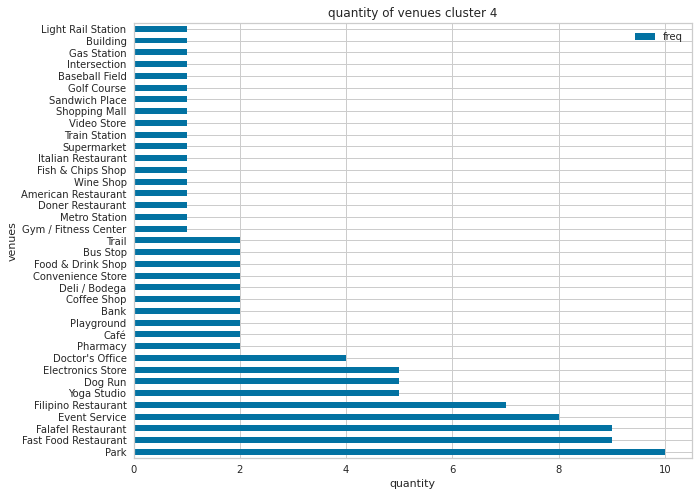

In [79]:
values4_df.plot.barh(figsize=(10, 8), x='values', y='freq')

plt.xlabel('quantity') # add to x-label to the plot
plt.ylabel('venues') # add y-label to the plot
plt.title('quantity of venues cluster 4') # add title to the plot

plt.show()

---    
**CLUSTER 5**

Exploring venues categories:

In [80]:
values5 = pd.value_counts(cluster5[["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue","7th Most Common Venue","8th Most Common Venue","9th Most Common Venue","10th Most Common Venue"]].values.ravel()) 
values5

Fast Food Restaurant         2
Middle Eastern Restaurant    2
Event Service                2
Filipino Restaurant          2
Fish & Chips Shop            2
Falafel Restaurant           2
Doner Restaurant             2
Electronics Store            1
Lawyer                       1
Gym / Fitness Center         1
Intersection                 1
Yoga Studio                  1
Dog Run                      1
dtype: int64

In [81]:
values5_df = pd.DataFrame(values5).reset_index()
values5_df.columns = ['values', 'freq']
values5_df.head()

,values,freq
0,Fast Food Restaurant,2
1,Middle Eastern Restaurant,2
2,Event Service,2
3,Filipino Restaurant,2
4,Fish & Chips Shop,2


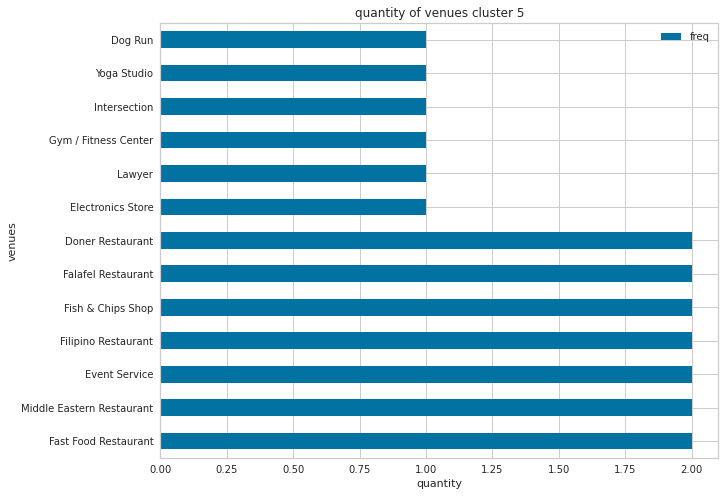

In [82]:
values5_df.plot.barh(figsize=(10, 8), x='values', y='freq')

plt.xlabel('quantity') # add to x-label to the plot
plt.ylabel('venues') # add y-label to the plot
plt.title('quantity of venues cluster 5') # add title to the plot

plt.show()

---    
**CLUSTER 1**

Public Transportation and Park venues:

In [83]:
print ("Metro Stations Cluster 1: " , values1_df[values1_df.values == 'Metro Station'].sum().values)
print ("Light Rail  Cluster 1: " , values1_df[values1_df.values == 'Light Rail Station'].sum().values)
print ("Bus Station Cluster 1: " , values1_df[values1_df.values == 'Bus Station'].sum().values)
print ("Bus Stop Cluster 1: " , values1_df[values1_df.values == 'Bus Stop'].sum().values)
print ("Train Station Cluster 1: " , values1_df[values1_df.values == 'Train Station'].sum().values)
print ("Park Cluster 1: " , values1_df[values1_df.values == 'Park'].sum().values)

Metro Stations Cluster 1:  [0. 0.]
Light Rail  Cluster 1:  [0. 0.]
Bus Station Cluster 1:  [0. 0.]
Bus Stop Cluster 1:  [0. 0.]
Train Station Cluster 1:  [0. 0.]
Park Cluster 1:  [0. 0.]


---    
**CLUSTER 2**

Public transportation options:

In [84]:
print ("Metro Stations Cluster 2: " , values2_df[values2_df.values == 'Metro Station'].sum().values)
print ("Light Rail  Cluster 2: " , values2_df[values2_df.values == 'Light Rail Station'].sum().values)
print ("Bus Station Cluster 2: " , values2_df[values2_df.values == 'Bus Station'].sum().values)
print ("Bus Stop Cluster 2: " , values2_df[values2_df.values == 'Bus Stop'].sum().values)
print ("Train Station Cluster 2: " , values2_df[values2_df.values == 'Train Station'].sum().values)
print ("Park Cluster 2: " , values2_df[values2_df.values == 'Park'].sum().values)

Metro Stations Cluster 2:  ['Metro Station' 1]
Light Rail  Cluster 2:  ['Light Rail Station' 1]
Bus Station Cluster 2:  ['Bus Station' 1]
Bus Stop Cluster 2:  [0. 0.]
Train Station Cluster 2:  [0. 0.]
Park Cluster 2:  ['Park' 9]


---    
**CLUSTER 3**

Public transportation options:

In [85]:
print ("Metro Stations Cluster 3: " , values3_df[values3_df.values == 'Metro Station'].sum().values)
print ("Light Rail Cluster 3: " , values3_df[values3_df.values == 'Light Rail Station'].sum().values)
print ("Bus Station Cluster 3: " , values3_df[values3_df.values == 'Bus Station'].sum().values)
print ("Bus Stop Cluster 3: " , values3_df[values3_df.values == 'Bus Stop'].sum().values)
print ("Train Station Cluster 3: " , values3_df[values3_df.values == 'Train Station'].sum().values)
print ("Park Cluster 3: " , values3_df[values3_df.values == 'Park'].sum().values)

Metro Stations Cluster 3:  [0. 0.]
Light Rail Cluster 3:  [0. 0.]
Bus Station Cluster 3:  [0. 0.]
Bus Stop Cluster 3:  [0. 0.]
Train Station Cluster 3:  [0. 0.]
Park Cluster 3:  [0. 0.]


---    
**CLUSTER 4**

Public transportation options:

In [86]:
print ("Metro Stations Cluster 4: " , values4_df[values4_df.values == 'Metro Station'].sum().values)
print ("Light Rail Cluster 4: " , values4_df[values4_df.values == 'Light Rail Station'].sum().values)
print ("Bus Station Cluster 4: " , values4_df[values4_df.values == 'Bus Station'].sum().values)
print ("Bus Stop Cluster 4: " , values4_df[values4_df.values == 'Bus Stop'].sum().values)
print ("Train Station Cluster 4: " , values4_df[values4_df.values == 'Train Station'].sum().values)
print ("Park Cluster 4: " , values4_df[values4_df.values == 'Park'].sum().values)

Metro Stations Cluster 4:  ['Metro Station' 1]
Light Rail Cluster 4:  ['Light Rail Station' 1]
Bus Station Cluster 4:  [0. 0.]
Bus Stop Cluster 4:  ['Bus Stop' 2]
Train Station Cluster 4:  ['Train Station' 1]
Park Cluster 4:  ['Park' 10]


---    
**CLUSTER 5**

Public transportation options:

In [87]:
print ("Metro Stations Cluster 5: " , values5_df[values5_df.values == 'Metro Station'].sum().values)
print ("Light Rail Cluster 5: " , values5_df[values5_df.values == 'Light Rail Station'].sum().values)
print ("Bus Station Cluster 5: " , values5_df[values5_df.values == 'Bus Station'].sum().values)
print ("Bus Stop Cluster 5: " , values5_df[values5_df.values == 'Bus Stop'].sum().values)
print ("Train Station Cluster 5: " , values5_df[values5_df.values == 'Train Station'].sum().values)
print ("Park Cluster 5: " , values5_df[values5_df.values == 'Park'].sum().values)

Metro Stations Cluster 5:  [0. 0.]
Light Rail Cluster 5:  [0. 0.]
Bus Station Cluster 5:  [0. 0.]
Bus Stop Cluster 5:  [0. 0.]
Train Station Cluster 5:  [0. 0.]
Park Cluster 5:  [0. 0.]


---    
**4.5.2-	Exploring One Bedroom Average Rent apartments and Average MCI:**

*- It will show the average of MCI and rent of one bedroom apartments in clusters.*

In [88]:
clusters_MCI = [cluster1['MCI'].mean(),cluster2['MCI'].mean(),cluster3['MCI'].mean(),cluster4['MCI'].mean(),cluster5['MCI'].mean()]
clusters_Avg_Rent_1Bed = [cluster1['Avg_Rent_1Bed'].mean(),cluster2['Avg_Rent_1Bed'].mean(),cluster3['Avg_Rent_1Bed'].mean(),cluster4['Avg_Rent_1Bed'].mean(),cluster5['Avg_Rent_1Bed'].mean()]

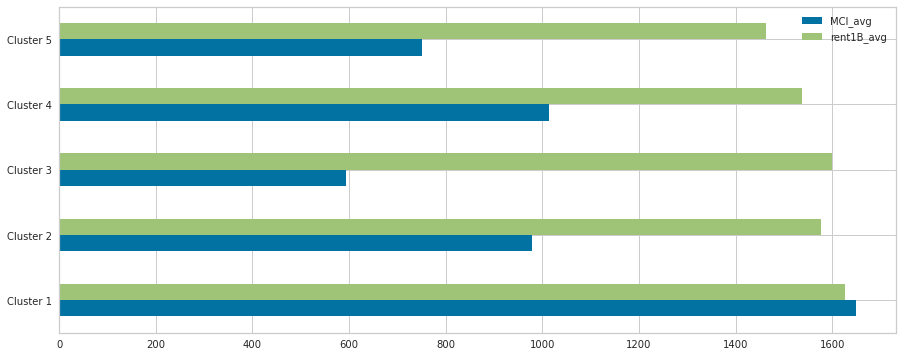

In [89]:
index = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
Means_clusters = pd.DataFrame({'MCI_avg':clusters_MCI, 'rent1B_avg':clusters_Avg_Rent_1Bed}, index=index)
ax = Means_clusters.plot.barh(figsize=(15, 6), rot=0)

In [90]:
print("The average MCI Cluster 1:", cluster1['MCI'].mean())
print("The average MCI Cluster 2:", cluster2['MCI'].mean())
print("The average MCI Cluster 3:", cluster3['MCI'].mean())
print("The average MCI Cluster 4:", cluster4['MCI'].mean())
print("The average MCI Cluster 5:", cluster5['MCI'].mean())

The average MCI Cluster 1: 1650.0
The average MCI Cluster 2: 977.9807692307693
The average MCI Cluster 3: 593.0
The average MCI Cluster 4: 1013.3
The average MCI Cluster 5: 751.5


In [91]:
print("The average Rent 1 Bed. Cluster 1:", cluster1['Avg_Rent_1Bed'].mean())
print("The average Rent 1 Bed. Cluster 2:", cluster2['Avg_Rent_1Bed'].mean())
print("The average Rent 1 Bed. Cluster 3:", cluster3['Avg_Rent_1Bed'].mean())
print("The average Rent 1 Bed. Cluster 4:", cluster4['Avg_Rent_1Bed'].mean())
print("The average Rent 1 Bed. Cluster 5:", cluster5['Avg_Rent_1Bed'].mean())

The average Rent 1 Bed. Cluster 1: 1627.0
The average Rent 1 Bed. Cluster 2: 1577.423076923077
The average Rent 1 Bed. Cluster 3: 1600.0
The average Rent 1 Bed. Cluster 4: 1536.9
The average Rent 1 Bed. Cluster 5: 1462.0


## 5. Results and Discussion <a name="results"></a>

It explored the data based on the requirement, principally safety and value of rent (One bedroom apartments), because of that it applied.

It explored the data based on the requirements, first it filtered the neighborhoods throughout the safety and value of rent (One bedroom apartments) levels, for that it used 2 Histograms and create 5 ranges, for both, rent average and MCI.

This first step let it clean the neighborhoods that did not comply with these restrictions, it could obtain 66 neighborhoods.

With this 66 neighborhoods, it can create 5 clusters (using K-elbow and K-means), it can observe from this 5 cluster:

**•	Cluster 1:** With only one neighborhood, Agincourt South-Malvern West, its venues are diverse, between food places, Electronic Store, Yoga Studio. This Cluster doesn't have parks or public transportations options (at least among its most common). The Average Rent for one-bedroom apartments is higher (CAD 1.627), as well as it is Major Crime Indicator – MCI (1.650).

**•	Cluster2:** Is the biggest cluster with 52 neighborhoods, its most commons venues are the Coffee Shop, Fast Food Restaurants (more than 20 each one), other interesting common venues are the Pharmacy and Bank. This Cluster has one Metro Station, one Light Rail Station, and one Bus Station, and nine parks. The Average Rent for one-bedroom apartments is CAD 1.577,4 below. The average of Major Crime Indicator - MCI is the third lowest (977,98).

**•	Cluster3:** With only one neighborhood, Elms-Old Rexdale, its venues are diverse, between Dog Run, Golf Course, Yoga Studio, and different types of restaurants, including a bar. This Cluster doesn't have parks or public transportations options (at least among its most common). The Average Rent for one-bedroom apartments is the second higher (CAD 1.600), and its Major Crime Indicator - MCI is the lowest (593).

**•	Cluster4:** With ten neighborhoods, is the second biggest cluster, its most commons venues are Park, Fast Food Restaurant, and Falafel Restaurant, other interesting common venues are Yoga Studio, Doctor's Office, Pharmacy, and Bank. This Cluster has one Metro Station, one Light Rail Station and two Bus Station, one Train Station and ten parks. The Average Rent for one-bedroom apartments is CAD 1.536,9. The average of Major Crime Indicator - MCI is the fourth lowest (1.013,3).

**•	Cluster 5:** It has 2 neighborhoods, Henry Farm and Highland Creek, its most commons venues are different types of restaurants (Fast Food, Middle Eastern, Falafel, etc.), other interesting venues are a Yoga studio and Gym / Fitness Center. This Cluster doesn't have parks or public transportations options (at least among its most common). The Average Rent for one-bedroom apartments is the lowest, CAD 1.462. The average of Major Crime Indicator - MCI is the second lowest (751,5).

## 6. Conclusion <a name="conclusion"></a>

If it review the features that "Linda" give us:

**1-** The rent price around CAD 1.700 (1 bedroom)

**2-** Secure Levels

**4-** Near to different public transportation options (bus, train, metro, etc.)

**5-** Near to food places

**6-** Near to a park

Thanks to our first filter, it can say that all cluster complied with the rent price and security level that "Linda" desire.

The only clusters that comply with all features are Cluster 2 and Cluster 4, the rest all them doesn't have parks or public transportations options (at least among its most common).

**Cluster 2** has one Metro Station, one Light Rail Station, and one Bus Station, and nine parks.

**Cluster 4** has one Metro Station, one Light Rail Station, and two Bus Station, one Train Station and ten parks.

**Cluster 4** could be an excellent choice because has near more parks and public transportation options, the average of MCI and rent are acceptable too, however, **Cluster 2** could be an excellent choice too.